Basically the main idea of the project is to predict the house price(as it depends on many other parameters like basement    area,first floor, second floor, etc). So, the term house price is  a dependent variable. For predicting the value of a dependent variable we are going to use regression techniques.   The main steps of the project is:-

1) Importing the required libraries and packages
2) importing the data
3) filtering the data( clearing the Null Values)
4) Observing each feature with respect to house price(Data visualiztion)
5) Feature selection and data split
6) prediction of the target variable by using regression technique

Below is the code for importing required packages and libraries

In [11]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as snb # visualization
from termcolor import colored as cl # text customization

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

snb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size

In [12]:
df = pd.read_csv('House_Data.csv')# reding the csv file
df.set_index('Id', inplace = True)# separting the id featute
df.head(5)  # prints the first five rows of data frame

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1,8450,196.0,150,856,856,854,1710,548,0,61,208500
2,9600,0.0,284,1262,1262,0,1262,460,298,0,181500
3,11250,162.0,434,920,920,866,1786,608,0,42,223500
4,9550,0.0,540,756,961,756,1717,642,0,35,140000
5,14260,350.0,490,1145,1145,1053,2198,836,192,84,250000


In [13]:
df.tail(5)   # prints the last five rows of data frame

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
Id,,,,,,,,,,,
1456,7917,0.0,953,953,953,694,1647,460,0,40,175000
1457,13175,119.0,589,1542,2073,0,2073,500,349,0,210000
1458,9042,0.0,877,1152,1188,1152,2340,252,0,60,266500
1459,9717,0.0,0,1078,1078,0,1078,240,366,0,142125
1460,9937,0.0,136,1256,1256,0,1256,276,736,68,147500


In [14]:
df.dropna(inplace = True)# replaces the null values

print(cl(df.isnull().sum(), attrs = ['bold']))

LotArea        0
MasVnrArea     0
BsmtUnfSF      0
TotalBsmtSF    0
1stFlrSF       0
2ndFlrSF       0
GrLivArea      0
GarageArea     0
WoodDeckSF     0
OpenPorchSF    0
SalePrice      0
dtype: int64


In [15]:
df.describe() # gives the statastical view of the data

,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,10507.276171,103.685262,567.070937,1055.847107,1161.270661,346.944215,1514.091598,472.475207,94.416667,46.390496,180615.063361
std,9989.563592,181.066207,442.082927,438.119089,385.018424,436.370724,525.627765,214.106397,125.393706,66.048619,79285.541485
min,1300.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,34900.000000
25%,7538.750000,0.000000,222.500000,794.750000,882.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,129900.000000
50%,9478.500000,0.000000,477.500000,990.500000,1086.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,162700.000000
75%,11600.000000,166.000000,808.000000,1297.250000,1391.000000,728.000000,1776.000000,576.000000,168.000000,68.000000,214000.000000
max,215245.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,1418.000000,857.000000,547.000000,755000.000000


In [16]:
print(cl(df.dtypes, attrs = ['bold']))# command for printing the datatype of each coloumn

LotArea          int64
MasVnrArea     float64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
GrLivArea        int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
SalePrice        int64
dtype: object


 The below are the commands for convrting the MasVnrArea into integer instead of float because the regression model does not take the floating point number 

In [17]:
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors = 'coerce') 
df['MasVnrArea'] = df['MasVnrArea'].astype('int64')# command for converting the float data into integer

print(cl(df.dtypes, attrs = ['bold']))

LotArea        int64
MasVnrArea     int64
BsmtUnfSF      int64
TotalBsmtSF    int64
1stFlrSF       int64
2ndFlrSF       int64
GrLivArea      int64
GarageArea     int64
WoodDeckSF     int64
OpenPorchSF    int64
SalePrice      int64
dtype: object


In [18]:
def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    c=['orange','yellow','aquamarine','deepskyblue','crimson','darkviolet','khaki','gold','r','deeppink']
    for j in range(10):
         snb.scatterplot(i[j], y_var, data = df, color = c[j], edgecolor = 'b', s = 150)
         plt.title('{} / Sale Price'.format(i[j]), fontsize = 16)
         plt.xlabel('{}'.format(i[j]), fontsize = 14)
         plt.ylabel('Sale Price', fontsize = 14)
         plt.xticks(fontsize = 12)
         plt.yticks(fontsize = 12)
         plt.savefig('scatter[j].png')
         plt.show()
    
   
    
    
    


C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


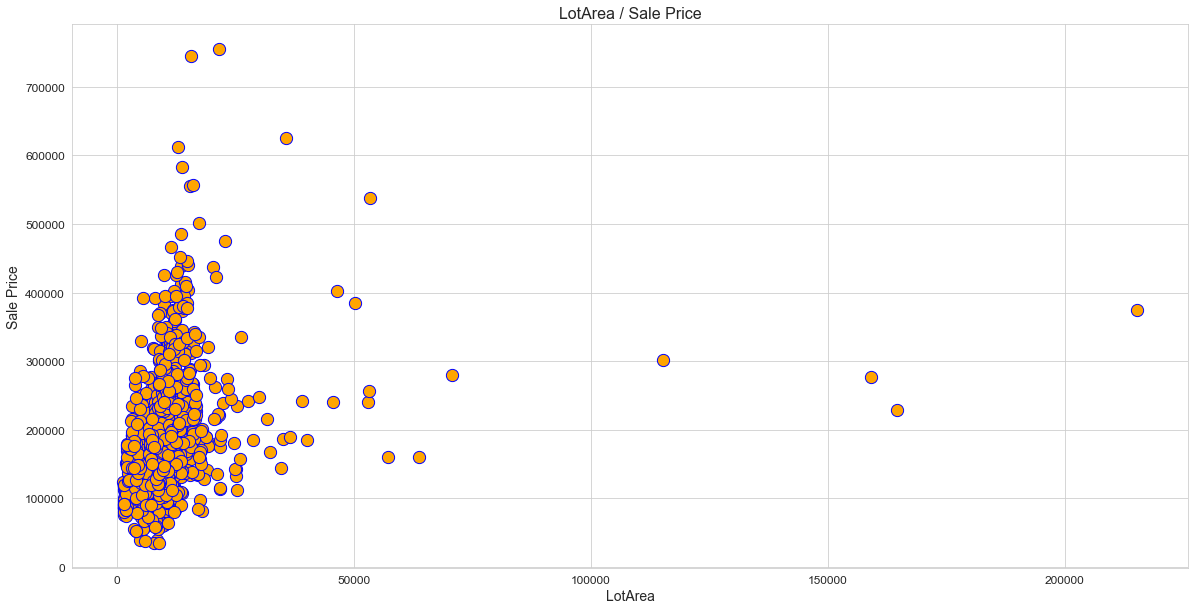

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


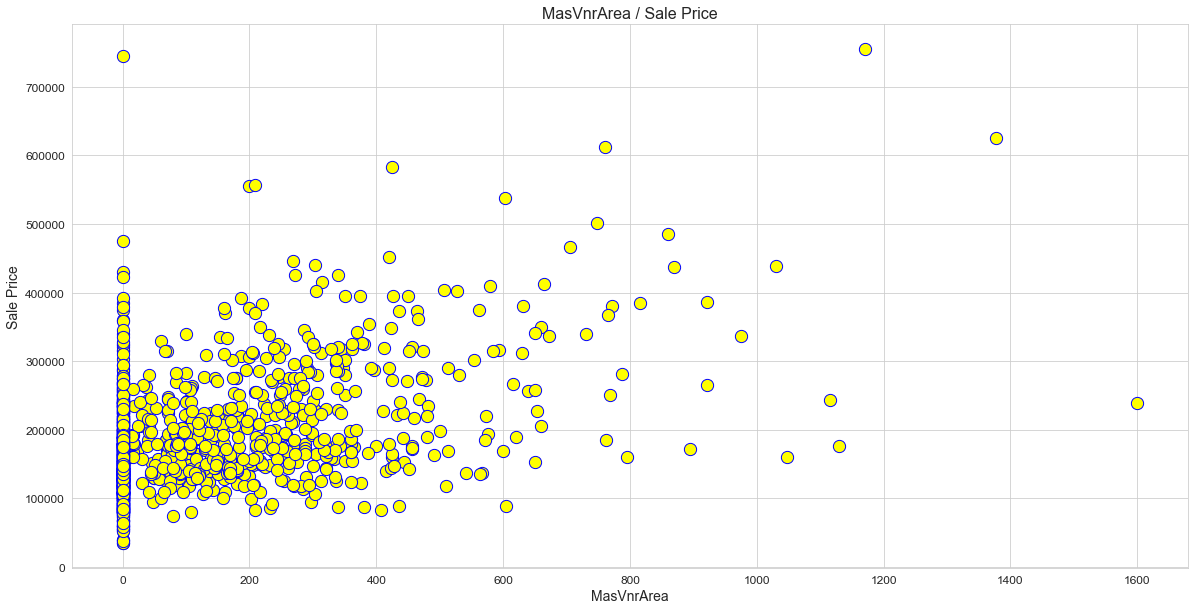

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


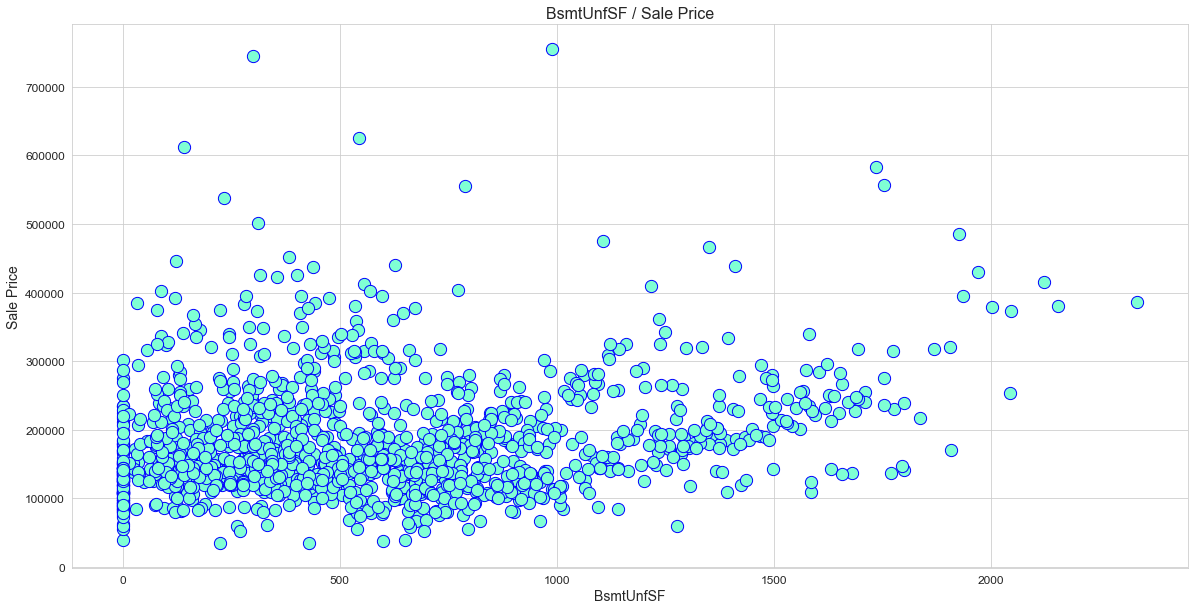

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


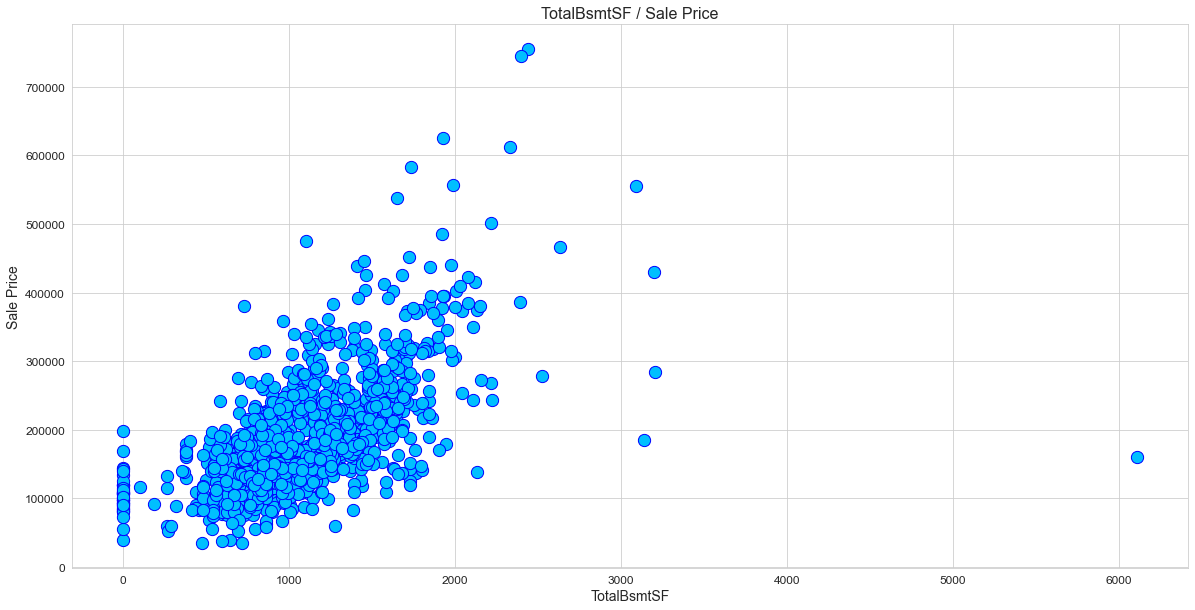

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


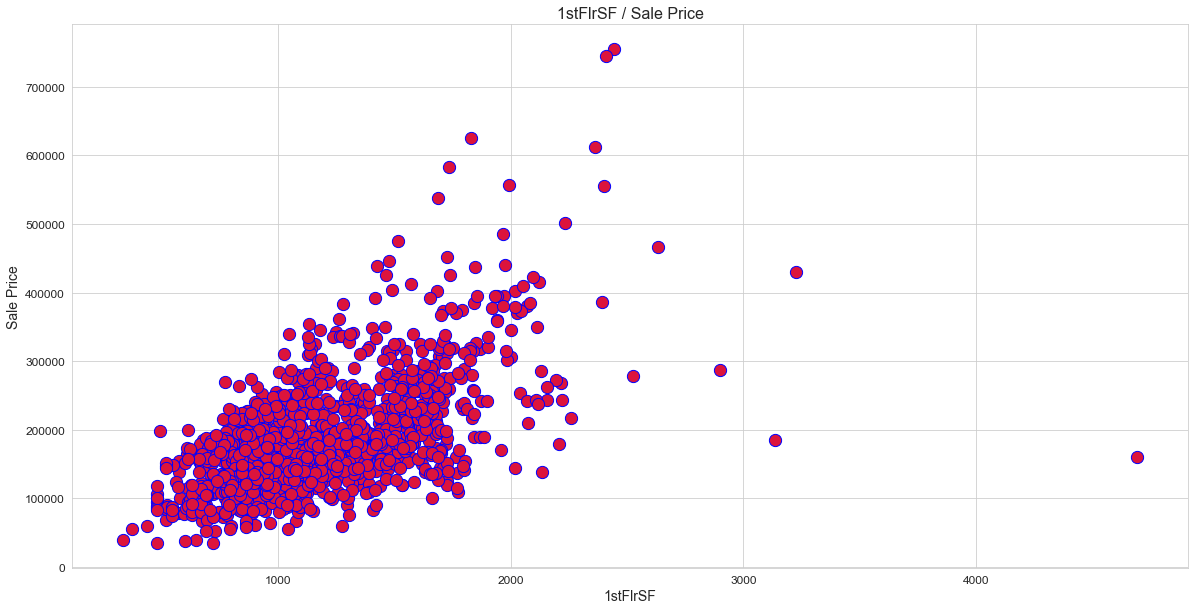

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


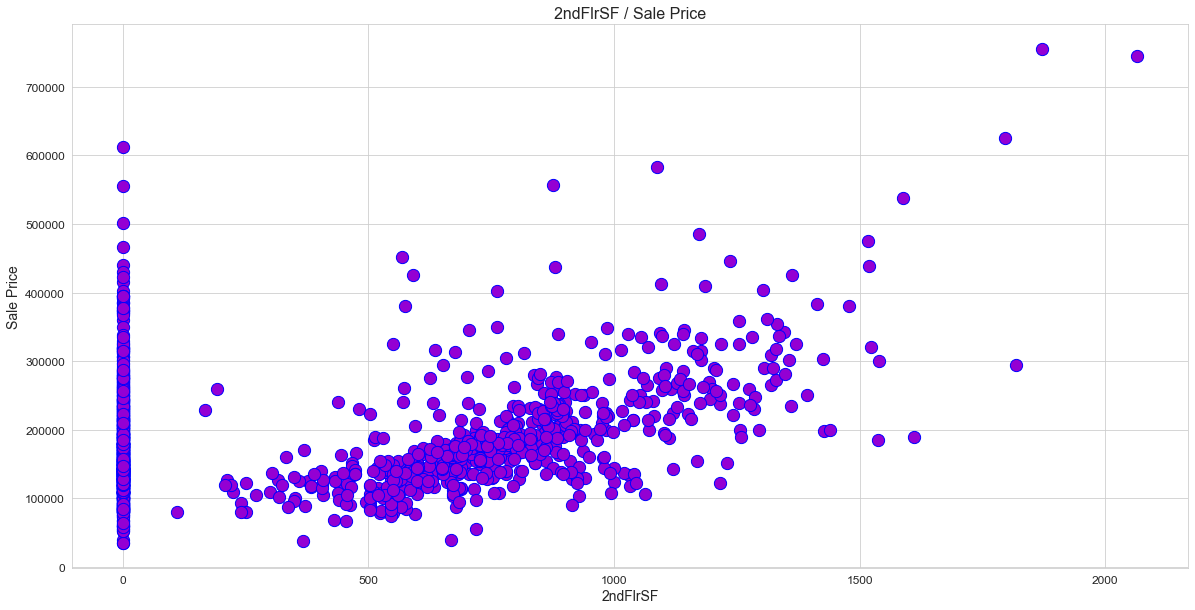

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


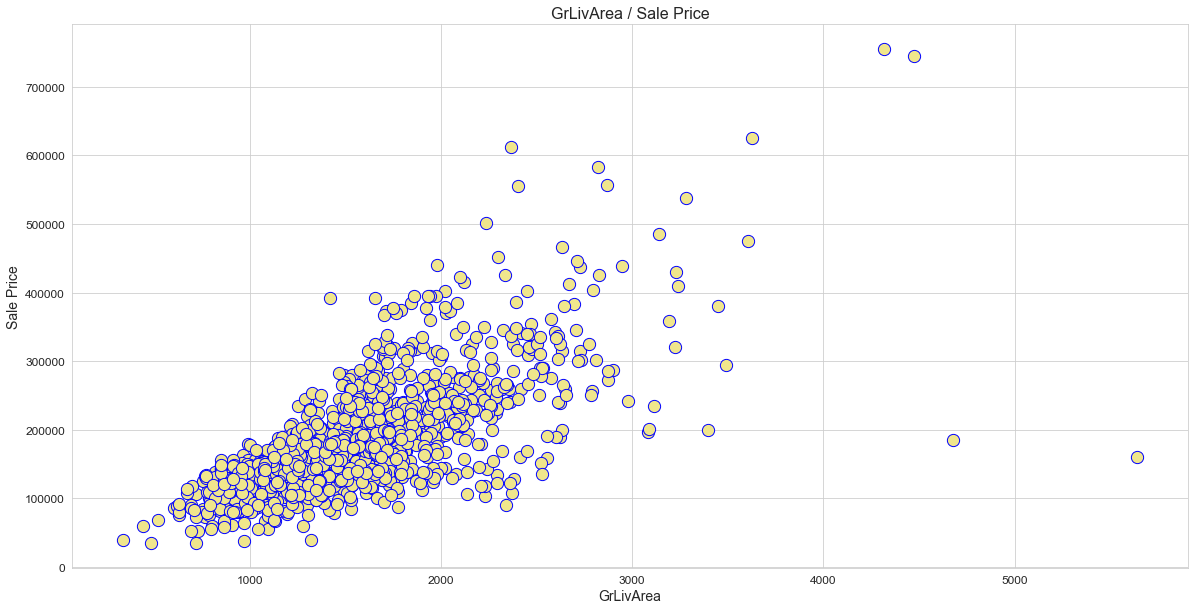

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


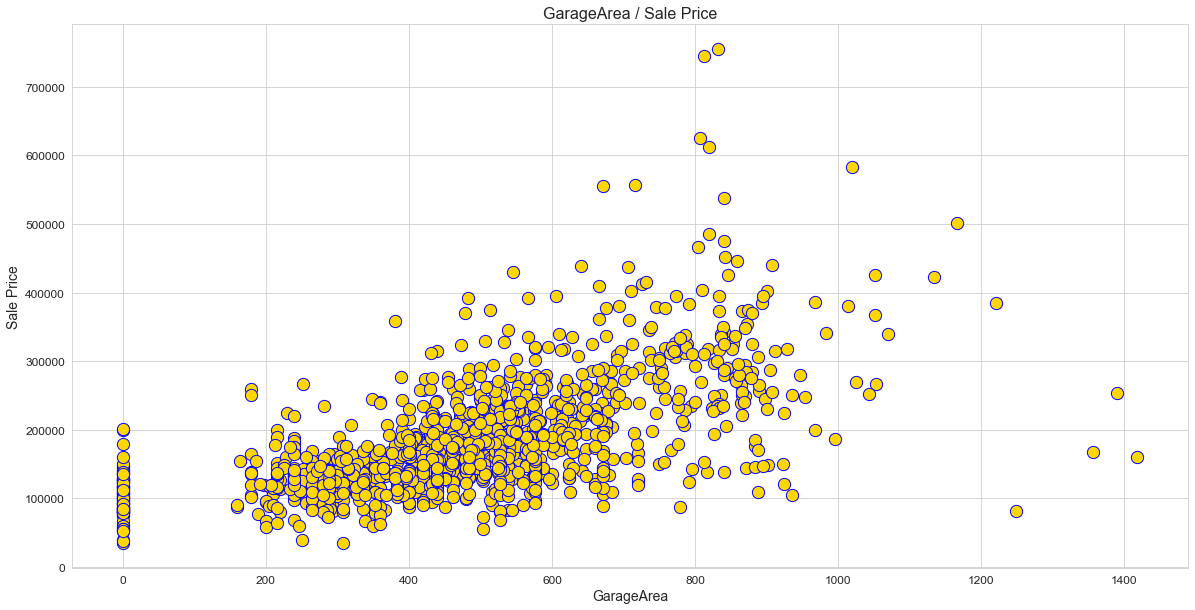

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


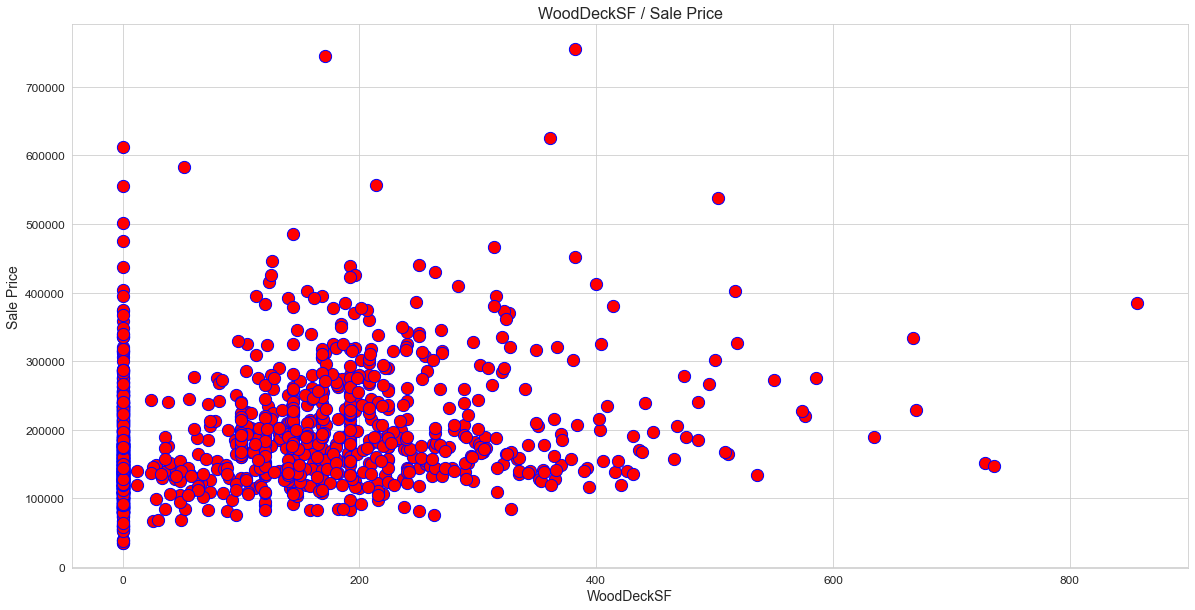

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


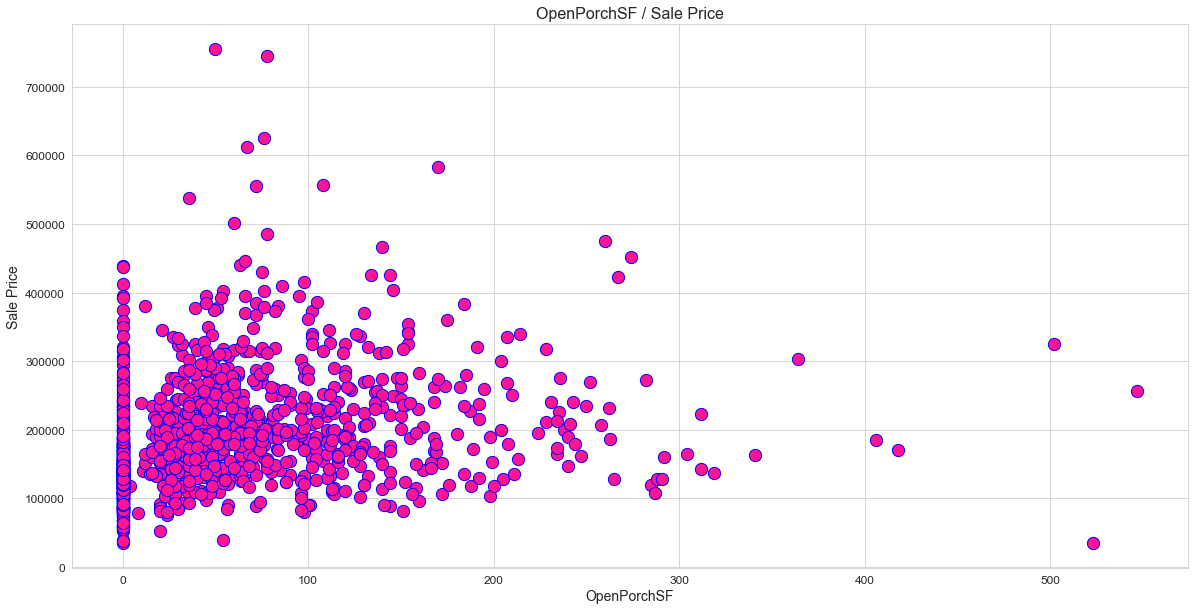

In [19]:
scatter_df('SalePrice')

C:\Users\eswar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


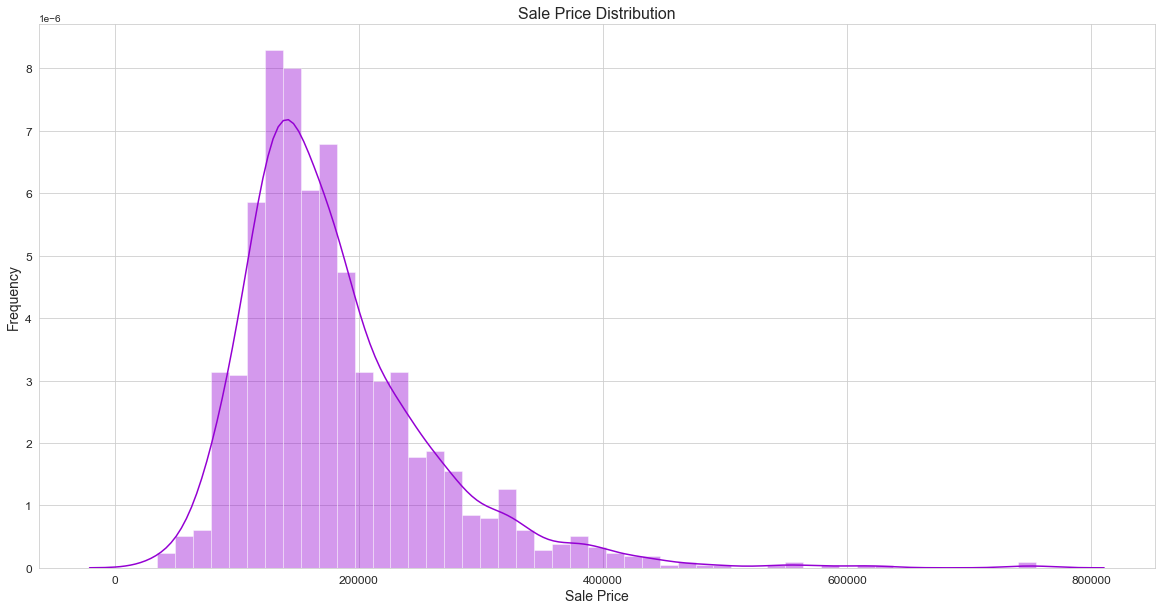

In [20]:
snb.distplot(df['SalePrice'], color = 'darkviolet')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('Sale Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

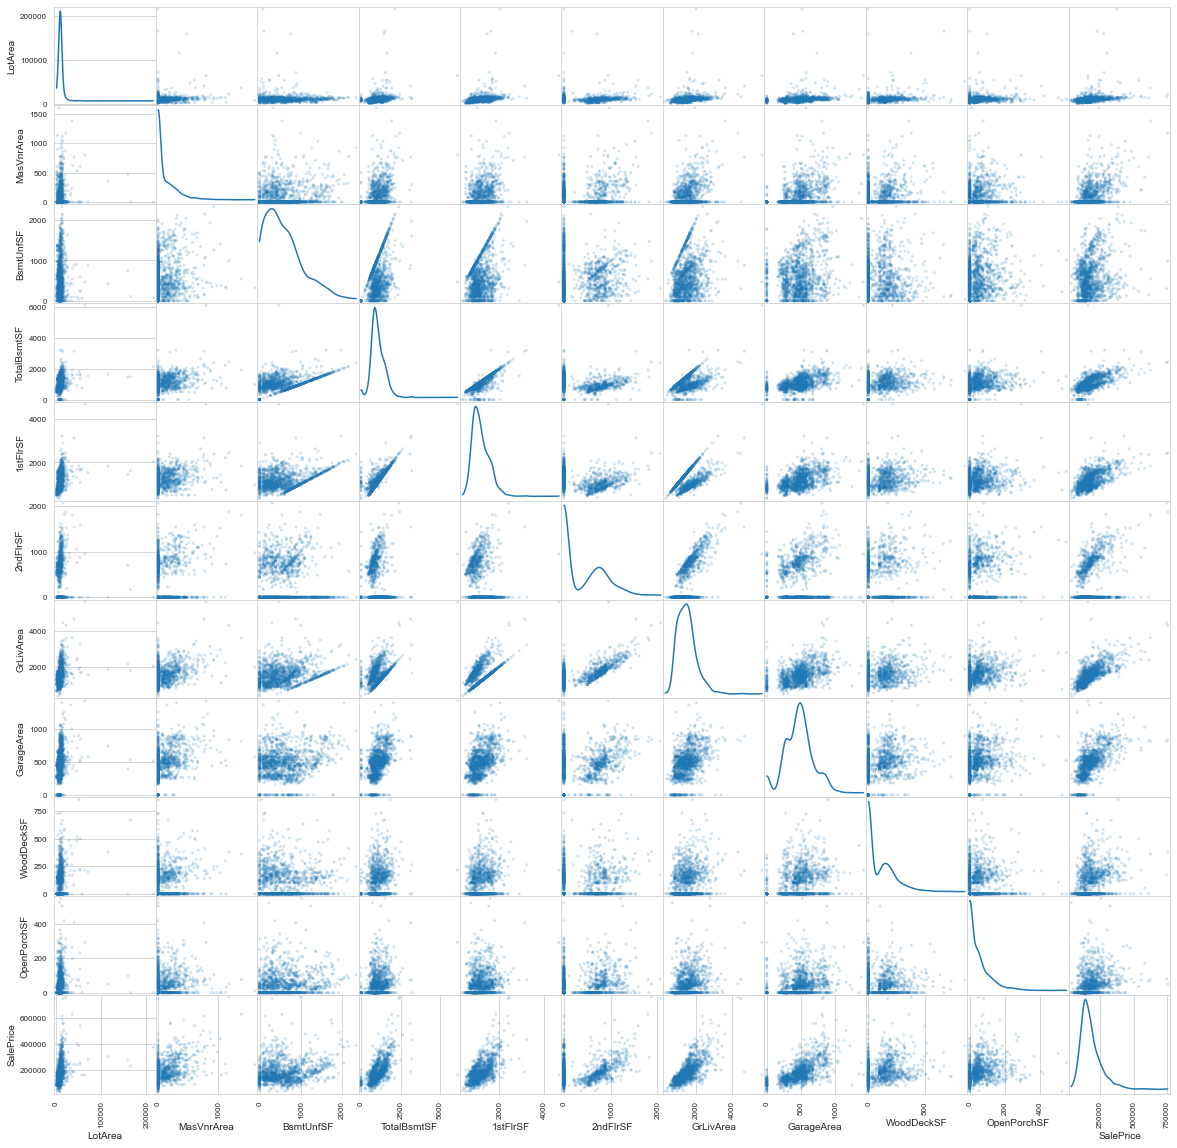

In [21]:

pd.plotting.scatter_matrix(df, alpha=0.2, diagonal='kde', figsize=(20,20))
plt.show()


<AxesSubplot:ylabel='Frequency'>

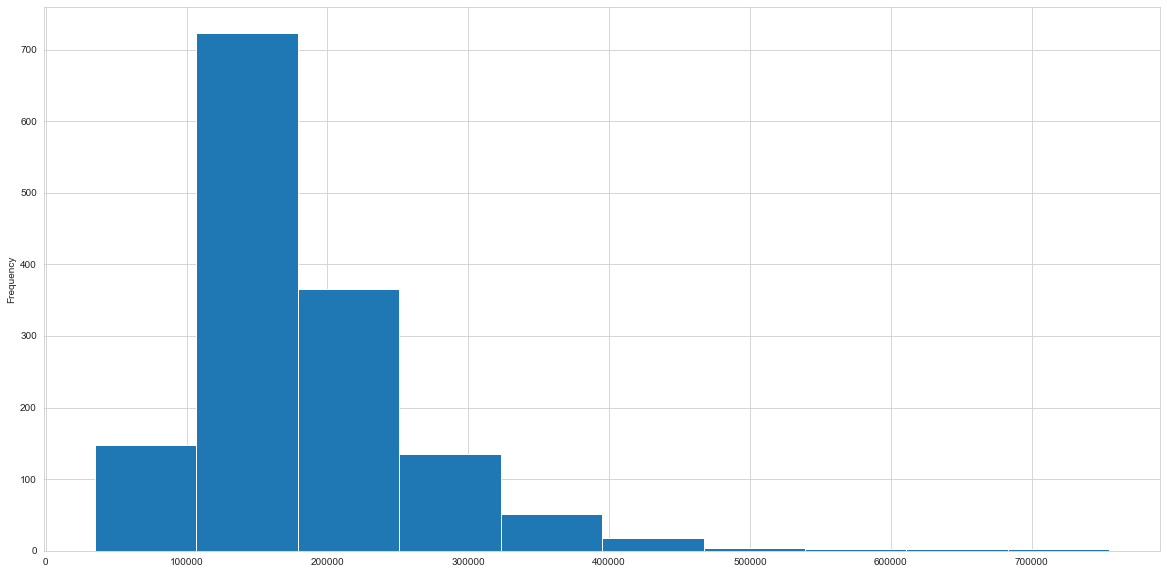

In [22]:
df['SalePrice'].plot.hist()

In [23]:
X = df[['LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
T= df['SalePrice'].values
X_train, X_test, t_train, t_test = train_test_split(X,T,train_size=0.8,test_size=0.2)
print(cl('X_train samples : ', attrs = ['bold']), X_train[0:5])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:5])
print(cl('t_train samples : ', attrs = ['bold']), t_train[0:5])
print(cl('t_test samples : ', attrs = ['bold']), t_test[0:5])

X_train samples :  [[10994   366   868  1844  1844     0  1844   620   165    44]
 [ 7094     0   340   894   894     0   894   384     0     0]
 [ 5395     0   604  1337  1337     0  1337   462    96     0]
 [15623     0   300  2396  2411  2065  4476   813   171    78]
 [ 5063   166   410  1314  1314     0  1314   626   172    62]]
X_test samples :  [[15431   200   788  3094  2402     0  2402   672     0    72]
 [ 6762   108   544  1208  1208     0  1208   628   105    54]
 [11911     0   684   684   684   876  1560   400   100    38]
 [ 3182    16  1330  1346  1504     0  1504   457   156     0]
 [10192   143   570   570  1222   698  1920   487     0    98]]
t_train samples :  [257000 125000 180000 745000 207500]
t_test samples :  [555000 195400 174000 181000 170000]


In [30]:
d= ElasticNet(alpha=0.5,l1_ratio=0.7)
d.fit(X_train,t_train)
dpre=d.predict(X_test)
dscore=d.score(X_train,t_train)
dscore

C:\Users\eswar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 909653646669.3755, tolerance: 738648124.4735547
  model = cd_fast.enet_coordinate_descent(


0.73673838172907

In [31]:
b=Ridge(alpha=0.5)
b.fit(X_train,t_train)
bpre=b.predict(X_test)
train_score1 = b.score(X_train,t_train)
train_score1


0.7367383818746418

In [41]:
e=BayesianRidge()
e.fit(X_train,t_train)
epre=e.predict(X_test)
epre1=e.predict(X_train)
#escore=e.score(X_test,t_test)
train_score = e.score(X_train,t_train)
train_score

0.7364990775722897

In [33]:
print("Evaluation metrics of Elastic Net regression  is")
eval_names = [
    "R2",
    "MAPE",
    
]
print("{}\t{}".format(*eval_names))
results = [
            r2_score(t_test,dpre),
            mean_absolute_percentage_error(t_test,dpre),
           
        ]
print("{:.2f}\t{:.2f}".format(*results))


Evaluation metrics of Elastic Net regression  is
R2	MAPE
0.44	0.18


In [44]:
print("Evaluation metrics of Bayesian regression  is")
eval_names = [
    "R2",
    "MAPE",
    
]
print("{}\t{}".format(*eval_names))
results = [
            r2_score(t_test,epre),
            mean_absolute_percentage_error(t_test,epre),
           
        ]
print("{:.2f}\t{:.2f}".format(*results))


Evaluation metrics of Bayesian regression  is
R2	MAPE
0.44	0.18


In [38]:
print("Evaluation metrics of Bayesian regression  is")
eval_names = [
    "R2",
    "MAPE",
    
]
print("{}\t{}".format(*eval_names))
results = [
            r2_score(t_test,bpre),
            mean_absolute_percentage_error(t_test,bpre),
           
        ]
print("{:.2f}\t{:.2f}".format(*results))


Evaluation metrics of Bayesian regression  is
R2	MAPE
0.44	0.18


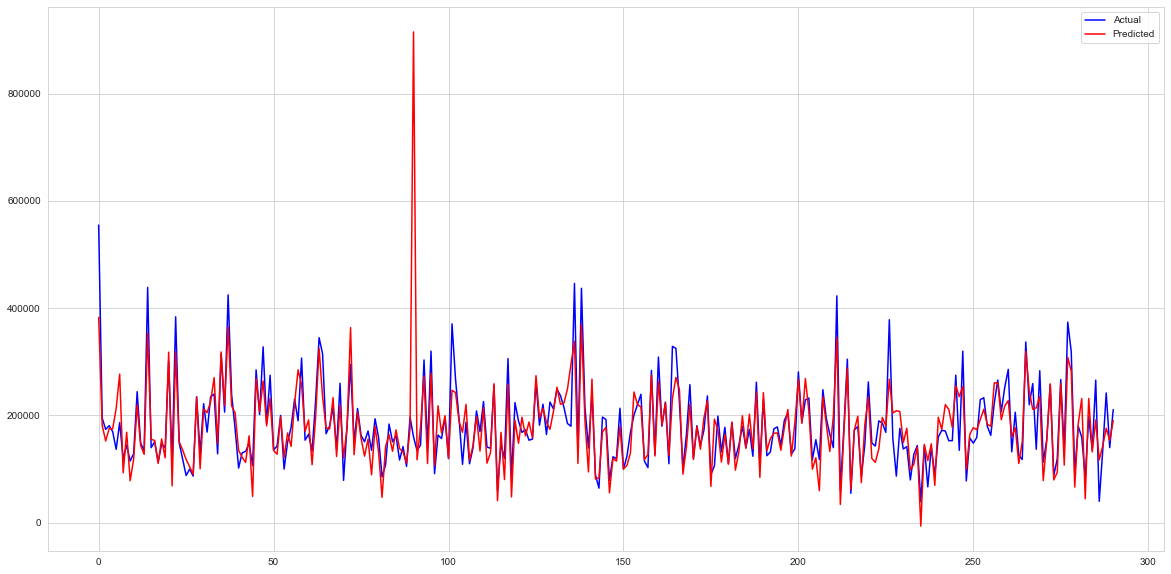

In [39]:

plt.plot(t_test,'b-',label='Actual')
plt.plot(epre,'r-',label='Predicted')
plt.legend()
plt.show()

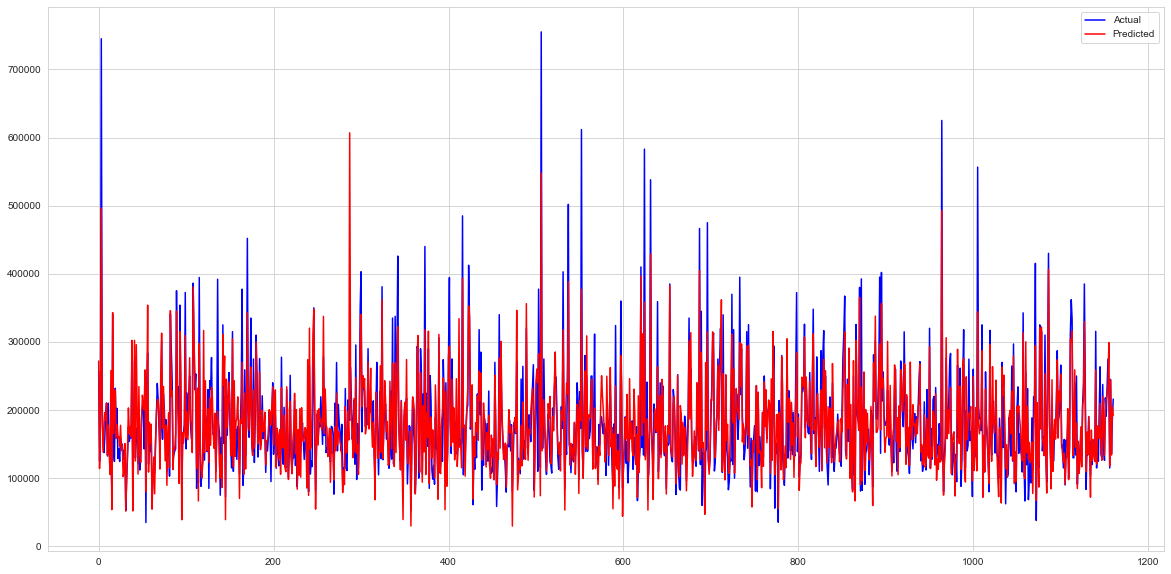

In [42]:

plt.plot(t_train,'b-',label='Actual')
plt.plot(epre1,'r-',label='Predicted')
plt.legend()
plt.show()